<a href="https://colab.research.google.com/github/taaha3244/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
torch.__version__

'2.0.1+cu118'

In [ ]:
device='gpu' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
train_data=torchvision.datasets.MNIST(root='data',
                                       download=True,
                                       transform=ToTensor(),
                                       train=True,
                                       target_transform=None)

test_data=torchvision.datasets.MNIST(root='data',
                                       download=True,
                                       transform=ToTensor(),
                                       train=False,
                                       target_transform=None)

100%|██████████| 9912422/9912422 [00:00<00:00, 124827245.18it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 81081455.04it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 40560509.75it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1929558.27it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
len(train_data),len(test_data)

(60000, 10000)

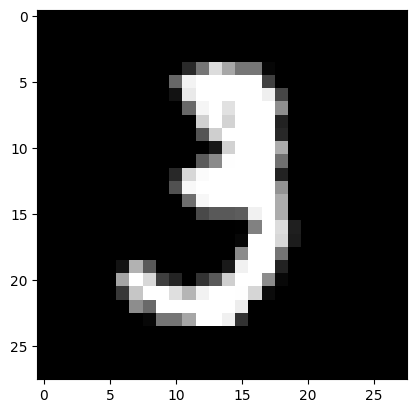

In [ ]:
img,label=train_data[10]
plt.imshow(img.permute(1,2,0),cmap='gray')
plt.show()

In [ ]:
class_names=train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

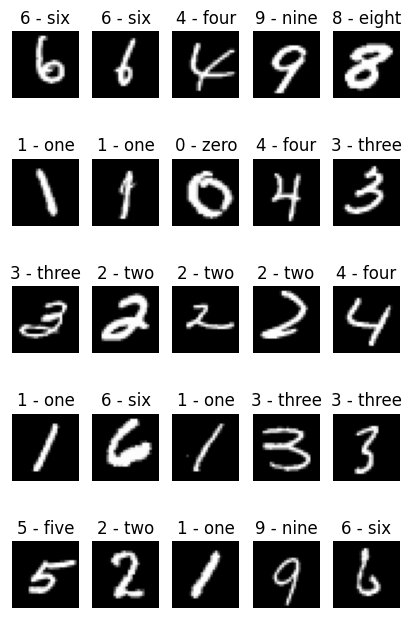

In [ ]:
fig=plt.figure(figsize=(5,8))
nrows=5
ncols=5
for i in range(nrows*ncols):
  rand_index=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[rand_index]
  fig.add_subplot(nrows,ncols,i+1)
  plt.imshow(img.permute(1,2,0),cmap='gray')
  plt.title(f'{class_names[label]}')
  plt.axis(False)



In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Text(0.5, 1.0, '0 - zero')

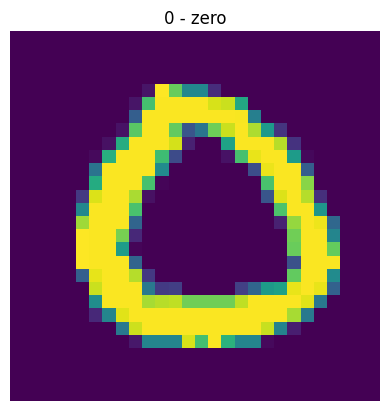

In [ ]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
rand_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[rand_idx],train_labels_batch[rand_idx]
plt.imshow(img.permute(1,2,0))
plt.axis(False)
plt.title(f'{class_names[label]}')

In [ ]:
print(f'Train Features :{train_features_batch.shape}, Train Lables: {train_labels_batch.shape}')
print(f'Length of Train features dataloader: {len(train_dataloader)}')

Train Features :torch.Size([64, 1, 28, 28]), Train Lables: torch.Size([64])
Length of Train features dataloader: 938


In [ ]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.block1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=10,            
                kernel_size=3,              
                stride=1,                   
                padding=1,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.block2 = nn.Sequential(         
            nn.Conv2d(10, 10, 3, 1, 1),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.classifier =nn.Sequential(
            nn.Flatten(),
            nn.Linear(10 * 7* 7, 10)
        ) 
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.classifier(x)
        return  x    # return x for visualization

In [ ]:
model_0=CNN()
model_0

CNN(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 11.5 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy
accuracy_fn=Accuracy(task='multiclass',num_classes=10)

In [ ]:
y_logits=model_0(train_features_batch)
y_labels=torch.softmax(y_logits,dim=0).argmax(dim=1)
acc=accuracy_fn(y_labels,train_labels_batch)
print(f'Accuracy{acc*100:.4f}%')


Accuracy7.8125%


In [ ]:
from tqdm.auto import tqdm
epochs=3
for epoch in tqdm(range(epochs)):
  print(f'Epoch :{epoch}/{epochs}--------')
  train_loss=0
  model_0.to(device)
  for batch,(X,y) in enumerate(train_dataloader):
    X,y=X.to(device),y.to(device)
    model_0.train()
    y_pred=model_0(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss/=len(train_dataloader)
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      X,y=X.to(device),y.to(device)
      test_pred=model_0(X)
      test_acc+=accuracy_fn(torch.softmax(test_pred,dim=0).argmax(dim=1),y)
      test_loss+=loss_fn(test_pred,y)
    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)
  print(f'Train loss:{train_loss}, Test Loss: {test_loss}, Test Acc: {test_acc*100:.2f}%')





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch :0/3--------
Train loss:1.004615068435669, Test Loss: 0.4317092001438141, Test Acc: 76.62%
Epoch :1/3--------
Train loss:0.30964237451553345, Test Loss: 0.23923857510089874, Test Acc: 81.88%
Epoch :2/3--------
Train loss:0.22825632989406586, Test Loss: 0.21143251657485962, Test Acc: 84.93%


In [ ]:
model_0.eval()
with torch.inference_mode():
  model_loss,model_acc=0,0
  for X,y in test_dataloader:
    y_pred=model_0(X)
    loss=loss_fn(y_pred,y)
    model_loss+=loss
    model_acc+=accuracy_fn(torch.softmax(y_pred,dim=0).argmax(dim=1),y)
  model_loss/=len(test_dataloader)
  model_acc/=len(test_dataloader)
  print(f'Loss of the model: {model_loss} ,Model Acc {model_acc*100:.3f}%')
  

Loss of the model: 0.21063603460788727 ,Model Acc 84.992%


In [ ]:
import random
test_samples=[]
test_labels=[]
for sample,labels in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(labels)
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

In [ ]:
def make_prediction(model:torch.nn.Module,
                    data:list,
                    device:torch.device=device):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device) 
      y_logit=model(sample)
      pred_prob=torch.softmax(y_logit.squeeze(),dim=0)
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [ ]:
pred_probs=make_prediction(model_0,test_samples)
print(pred_probs.argmax(dim=1))
print(test_labels)

In [ ]:
fig=plt.figure(figsize=(13,10))
nrows=3
ncols=3
for i in range(0,nrows*ncols):
  for sample in test_samples:
    img,label=test_samples[i],test_labels[i]
    test_label=test_labels[i]
    fig.add_subplot(nrows,ncols,i+1)
    plt.imshow(img.permute(1,2,0))
    plt.axis(False)
    plt.title(f'True Title:{class_names[label]}, Predicted Title:{class_names[test_label]}')

In [25]:
from tqdm.auto import tqdm
y_preds=[]
model_0.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc='Evaluating'):
    X,y=X.to(device),y.to(device)
    y_logit=model_0(X)
    y_prob=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_prob)
    y_pred_tensor=torch.cat(y_preds)

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

In [26]:
y_pred_tensor

tensor([9, 9, 3,  ..., 8, 9, 6])

In [27]:
# See if torchmetrics exists, if not, install it
try:
    import  mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.14.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.8 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


mlxtend version: 0.14.0


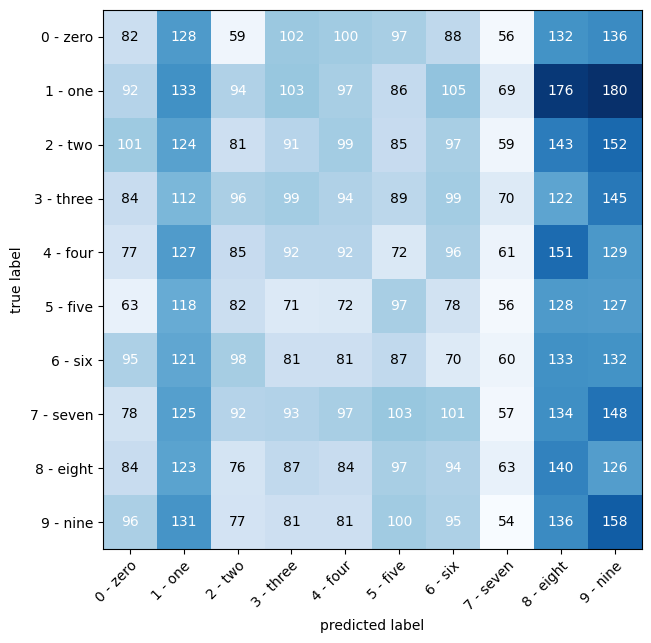

In [28]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);